In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from multiprocessing.pool import ThreadPool
from sklearn.metrics import mean_squared_error
import time
from sklearn import metrics
from collections import Counter
from sklearn.linear_model import LinearRegression 
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


pool = ThreadPool(processes=1)

sns.set()

data = pd.read_csv('train.csv',nrows = 10000000)       # Contains the first 10 million data from                                                                       
    
training_set = data.sample(n = 1000000 , replace = False)    # 1 million random data from same distribution
dev_set = data.sample(n = 10000 , replace = False)           # 10000 random data from same distribution
test_set = pd.read_csv('test.csv')

In [2]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
771135,40:09.0,9.50,2015-06-10 19:40:09 UTC,0.000000,0.000000,0.000000,0.000000,1
399292,00:24.0,62.25,2011-09-15 14:00:24 UTC,-73.993682,40.762323,-74.176838,40.694587,1
542956,19:08.0,4.10,2010-10-31 03:19:08 UTC,-73.983824,40.742378,-73.992659,40.742517,3
207607,53:00.0,23.30,2011-12-04 04:53:00 UTC,-73.983123,40.763082,-73.909005,40.853817,2
256685,32:00.0,4.50,2014-04-27 21:32:00 UTC,-73.963220,40.777790,-73.967945,40.769472,6


In [3]:
training_set.shape

(1000000, 8)

In [4]:
training_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.345252,-72.527293,39.930726,-72.530619,39.925958,1.685043
std,9.820316,12.043055,7.792443,11.452325,8.632000,1.323935
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992075,40.734967,-73.991379,40.734082,1.000000
50%,8.500000,-73.981806,40.752678,-73.980137,40.753188,1.000000
75%,12.500000,-73.967122,40.767142,-73.963676,40.768138,2.000000
max,500.000000,2522.271325,2621.628430,1717.003405,1989.728077,208.000000


In [6]:
dev_set.shape

(10000, 8)

In [7]:
dev_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
dev_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.266292,-72.598312,39.935180,-72.538435,39.938781,1.659400
std,9.916974,12.276219,5.999252,10.300231,5.985892,1.280451
min,2.500000,-736.483332,-74.015280,-75.425056,-73.988510,0.000000
25%,6.000000,-73.992260,40.735157,-73.991381,40.733462,1.000000
50%,8.500000,-73.981977,40.752396,-73.980096,40.752907,1.000000
75%,12.500000,-73.967757,40.767368,-73.963931,40.768109,2.000000
max,161.540000,40.778820,41.366138,40.785000,41.366138,6.000000


In [9]:
training_set.isnull().sum().sort_values(ascending = False)

dropoff_longitude    10
dropoff_latitude     10
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dtype: int64

In [10]:
dev_set.isnull().sum().sort_values(ascending = False)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
test_set.isnull().sum().sort_values(ascending = False)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
training_set = training_set.drop(training_set[training_set.isnull().any(1)].index , axis = 0)
training_set.shape

(999990, 8)

In [13]:
dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
dev_set.shape

(10000, 8)

In [14]:
test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
test_set.shape

(9914, 7)

Removing rows having invalid data

In [15]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.345127,-72.527353,39.930758,-72.530619,39.925958,1.685060
std,9.820016,12.042896,7.792379,11.452325,8.632000,1.323931
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992075,40.734966,-73.991379,40.734082,1.000000
50%,8.500000,-73.981806,40.752678,-73.980137,40.753188,1.000000
75%,12.500000,-73.967122,40.767142,-73.963676,40.768138,2.000000
max,500.000000,2522.271325,2621.628430,1717.003405,1989.728077,208.000000


In [16]:
training_set['fare_amount'].describe()

count    999990.000000
mean         11.345127
std           9.820016
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

Since there are negatuve values for fare, we will remove them

In [17]:
Counter(training_set['fare_amount']<=0)

Counter({False: 999925, True: 65})

In [18]:
training_set = training_set.drop(training_set[training_set['fare_amount']<=0].index, axis=0)
training_set.shape

(999925, 8)

In [19]:
training_set['fare_amount'].describe()

count    999925.000000
mean         11.346103
std           9.819421
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [20]:
training_set['passenger_count'].describe()

count    999925.000000
mean          1.685065
std           1.323937
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

Removing the rows with passenger count more than 7

In [21]:
Counter(training_set['passenger_count']>8)

Counter({False: 999923, True: 2})

In [22]:
training_set = training_set.drop(training_set[training_set['passenger_count']>8].index, axis = 0)
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000
mean,11.346018,-72.527553,39.930866,-72.531115,39.926229,1.684852
std,9.818990,12.042420,7.792228,11.450866,8.631548,1.307743
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992075,40.734967,-73.991379,40.734082,1.000000
50%,8.500000,-73.981807,40.752678,-73.980137,40.753189,1.000000
75%,12.500000,-73.967123,40.767142,-73.963677,40.768138,2.000000
max,500.000000,2522.271325,2621.628430,1717.003405,1989.728077,6.000000


Removing the fare amount that is less than 2.5 and greater than $500

In [23]:
print('\033[1m'+"Fare amount < 2.5: \n",training_set['fare_amount'][(training_set.fare_amount<2.5)].count())

Fare amount < 2.5: 
 11


In [24]:
print('\033[1m'+"Fare amount > 499: \n",training_set['fare_amount'][(training_set.fare_amount>499)].count())

Fare amount > 499: 
 1


In [25]:
training_set = training_set.drop(training_set[training_set['fare_amount'] < 2.5].index, axis = 0)
training_set = training_set.drop(training_set[training_set['fare_amount'] > 499].index, axis = 0)
training_set.shape

(999911, 8)

Text(0, 0.5, 'Frequency')

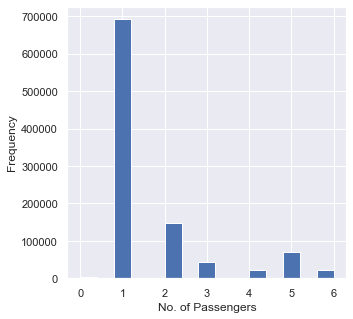

In [26]:
plt.figure(figsize=(5,5))
plt.hist(training_set['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

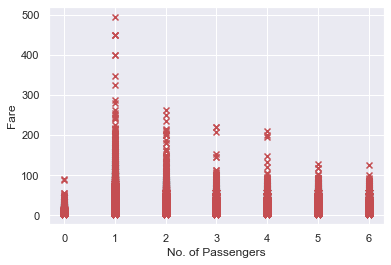

In [27]:
plt.scatter(x=training_set['passenger_count'], y=training_set['fare_amount'], c ='r' , marker = 'x')
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')


Removing invalid Longitude and Latitude

In [28]:
training_set[['pickup_longitude','pickup_latitude']].describe()


,pickup_longitude,pickup_latitude
count,999911.000000,999911.000000
mean,-72.527610,39.930897
std,12.042273,7.792172
min,-3377.680935,-3116.285383
25%,-73.992075,40.734967
50%,-73.981807,40.752678
75%,-73.967124,40.767142
max,2522.271325,2621.628430


In [29]:
training_set[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,999911.000000,999911.000000
mean,-72.531246,39.926300
std,11.450474,8.631415
min,-3383.296608,-3114.338567
25%,-73.991379,40.734082
50%,-73.980137,40.753189
75%,-73.963677,40.768138
max,1717.003405,1989.728077


The valid longitude range is: -180 to 180
Valid Latitude value is:  -90 to 90
Thus removing the rows which do not lie in this range

In [30]:
training_set = training_set.drop(training_set[training_set['pickup_latitude']<-90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_latitude']>90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_longitude']<-180].index,axis = 0)
training_set = training_set.drop(training_set[training_set['pickup_longitude']>180].index, axis=0)
training_set.shape

(999889, 8)

In [31]:
training_set = training_set.drop(training_set[training_set['dropoff_latitude']<-90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_latitude']>90].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_longitude']<-180].index,axis = 0)
training_set = training_set.drop(training_set[training_set['dropoff_longitude']>180].index, axis=0)
training_set.shape

(999871, 8)

In [32]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999871.000000,999871.000000,999871.000000,999871.000000,999871.000000,999871.000000
mean,11.345621,-72.519304,39.927337,-72.520327,39.928320,1.684864
std,9.806804,10.388256,6.092390,10.381497,6.090873,1.307748
min,2.500000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992075,40.734967,-73.991379,40.734082,1.000000
50%,8.500000,-73.981806,40.752678,-73.980137,40.753188,1.000000
75%,12.500000,-73.967123,40.767142,-73.963677,40.768138,2.000000
max,495.000000,40.850357,69.400000,45.581619,81.510177,6.000000


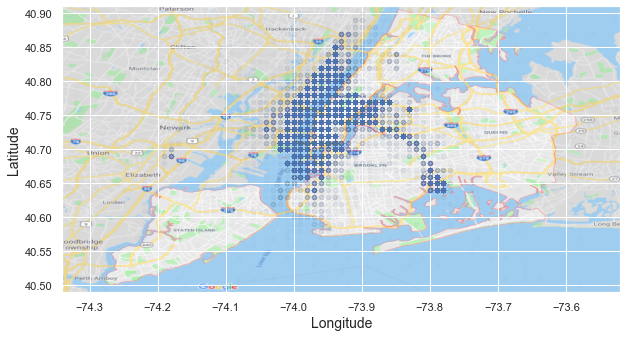

In [33]:
import matplotlib.image as mpimg
newyork_imp=mpimg.imread('newyork.png')
train_set1 = training_set.round({'pickup_longitude':2 , 'pickup_latitude':2})

ax = train_set1.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", figsize=(10,7),
                        alpha=0.01, color ='b')
plt.imshow(newyork_imp, extent=[-74.34, -73.52, 40.49, 40.91], alpha=0.9)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

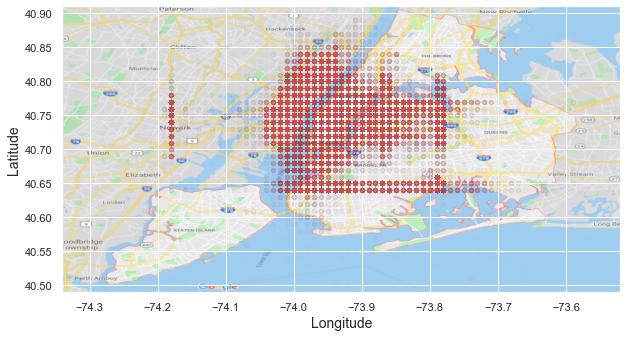

In [34]:
newyork_imp=mpimg.imread('newyork.png')
train_set1 = training_set.round({'dropoff_longitude':2 , 'pickup_latitude':2})

ax = train_set1.plot(kind="scatter", x="dropoff_longitude", y="pickup_latitude", figsize=(10,7),
                        alpha=0.01, color ='r' )
plt.imshow(newyork_imp, extent=[-74.34, -73.52, 40.49, 40.91], alpha=0.9)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

To find the distance using latitude and londitude, we will be using  Haversine formula
haversine(θ) = sin²(θ/2)

In [35]:
def haversine_distance(data):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = data[['pickup_longitude','pickup_latitude']]
    dropoff_data = data[['dropoff_longitude','dropoff_latitude']]
    
    phi1 = np.radians(pickup_data['pickup_latitude'])
    phi2 = np.radians(dropoff_data['dropoff_latitude'])
    
    delta_phi = np.radians(dropoff_data['dropoff_latitude'] - pickup_data['pickup_latitude'])
    delta_lambda = np.radians(dropoff_data['dropoff_longitude'] - pickup_data['pickup_longitude'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d

Finding Training set distance

In [36]:
training_set_distance = pd.DataFrame(haversine_distance(training_set) , columns=['Distance'])
training_set = pd.concat([training_set , training_set_distance] , axis = 1)

In [37]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
771135,40:09.0,9.50,2015-06-10 19:40:09 UTC,0.000000,0.000000,0.000000,0.000000,1,0.000000
399292,00:24.0,62.25,2011-09-15 14:00:24 UTC,-73.993682,40.762323,-74.176838,40.694587,1,17.173373
542956,19:08.0,4.10,2010-10-31 03:19:08 UTC,-73.983824,40.742378,-73.992659,40.742517,3,0.744482
207607,53:00.0,23.30,2011-12-04 04:53:00 UTC,-73.983123,40.763082,-73.909005,40.853817,2,11.861965
256685,32:00.0,4.50,2014-04-27 21:32:00 UTC,-73.963220,40.777790,-73.967945,40.769472,6,1.006869


In [38]:
training_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,999871.000000,999871.000000,999871.000000,999871.000000,999871.000000,999871.000000,999871.000000
mean,11.345621,-72.519304,39.927337,-72.520327,39.928320,1.684864,18.763012
std,9.806804,10.388256,6.092390,10.381497,6.090873,1.307748,358.860512
min,2.500000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000,0.000000
25%,6.000000,-73.992075,40.734967,-73.991379,40.734082,1.000000,1.213027
50%,8.500000,-73.981806,40.752678,-73.980137,40.753188,1.000000,2.116923
75%,12.500000,-73.967123,40.767142,-73.963677,40.768138,2.000000,3.880857
max,495.000000,40.850357,69.400000,45.581619,81.510177,6.000000,12594.704725


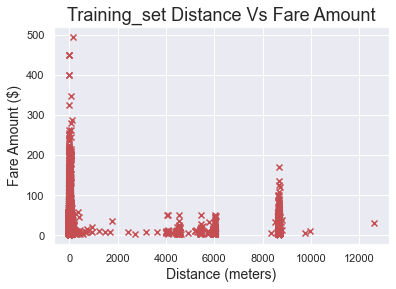

In [39]:
plt.scatter(training_set['Distance'] , training_set['fare_amount'] , c = 'r' , marker = 'x')
plt.title('Training_set Distance Vs Fare Amount',size = 18)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Fare Amount ($)',size = 14)
plt.show()

Finding Dev set distance

In [40]:
dev_set_distance = pd.DataFrame(haversine_distance(dev_set) , columns=['Distance'])
dev_set = pd.concat([dev_set , dev_set_distance] , axis = 1)

In [41]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
395701,25:31.0,15.5,2014-01-28 09:25:31 UTC,-74.008747,40.728857,-73.993098,40.758987,1,3.600358
353608,25:53.0,7.0,2012-11-07 06:25:53 UTC,-73.989843,40.747016,-73.971913,40.761088,1,2.174708
957797,41:30.0,6.9,2010-01-19 11:41:30 UTC,-73.953472,40.811179,-73.969094,40.790950,1,2.605516
112825,22:26.0,12.5,2015-06-15 08:22:26 UTC,-73.985634,40.740856,-73.981422,40.763687,1,2.563353
174791,40:47.0,6.9,2010-04-07 21:40:47 UTC,-73.982739,40.766599,-73.972686,40.749370,1,2.094556


In [42]:
dev_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.266292,-72.598312,39.935180,-72.538435,39.938781,1.659400,14.954904
std,9.916974,12.276219,5.999252,10.300231,5.985892,1.280451,315.620232
min,2.500000,-736.483332,-74.015280,-75.425056,-73.988510,0.000000,0.000000
25%,6.000000,-73.992260,40.735157,-73.991381,40.733462,1.000000,1.200671
50%,8.500000,-73.981977,40.752396,-73.980096,40.752907,1.000000,2.127165
75%,12.500000,-73.967757,40.767368,-73.963931,40.768109,2.000000,3.777302
max,161.540000,40.778820,41.366138,40.785000,41.366138,6.000000,8667.813102


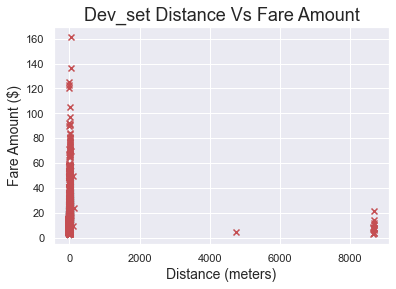

In [43]:
plt.scatter(dev_set['Distance'] , dev_set['fare_amount'] , c = 'r' , marker = 'x')
plt.title('Dev_set Distance Vs Fare Amount',size = 18)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Fare Amount ($)',size = 14)
plt.show()

Support Vector Regression on Feature Distance

In [44]:
def svr_linear(X,y):
    start_time = time.time()
    svr_lin = SVR(kernel='linear', C=7, gamma='auto')
    y_lin = svr_lin.fit(X, y)
    
    return svr_lin, start_time

def svr_RBF(X,y):
    start_time = time.time()
    svr_rbf = SVR(kernel='rbf', C=15, gamma=0.1, epsilon=.1)
    y_rbf = svr_rbf.fit(X, y)
    
    return svr_rbf, start_time

In [45]:
train_data = training_set.sample(n = 10000 , replace = False)
X = np.array(train_data['Distance']).reshape(len(train_data),1)
y = np.array(train_data['fare_amount'])

dev_data = dev_set.sample(n = 4256 , replace = False)
X_predict = np.array(dev_data['Distance']).reshape(len(dev_data),1)
y_predict = np.array(dev_data['fare_amount'])

In [46]:
t1 = pool.apply_async(svr_RBF, (X,y)) 
t2 = pool.apply_async(svr_linear, (X,y)) 

svr_rbf, rbf_start_time = t1.get()
svr_lin, lin_start_time = t2.get()

In [47]:
SVR_RBF_predict = svr_rbf.predict(X_predict)
SVR_Lin_predict = svr_lin.predict(X_predict)

SVR_RBF_mse = mean_squared_error(y_predict, SVR_RBF_predict)
SVR_Lin_mse = mean_squared_error(y_predict, SVR_Lin_predict)

SVR_RBF_rmse = np.sqrt(SVR_RBF_mse)
SVR_Lin_rmse = np.sqrt(SVR_Lin_mse)

print("Size of training data Set = ", len(train_data) ,"and size of validation data set = ", len(dev_data))
print("RMSE of Linear support vector regressor = " , SVR_Lin_rmse)
print("Run time of Linear support vector regressor = " , time.time() - lin_start_time  , "seconds")
print("\nRMSE of RBF support vector regressor = " , SVR_RBF_rmse)
print("Run time of RBF support vector regressor = " , time.time() - rbf_start_time , "seconds")

Size of training data Set =  10000 and size of validation data set =  4256
RMSE of Linear support vector regressor =  10.523386916729981
Run time of Linear support vector regressor =  36.84540772438049 seconds

RMSE of RBF support vector regressor =  5.8709201640678845
Run time of RBF support vector regressor =  39.70936632156372 seconds


From the above experiment we observed that the taxi fare doesn't depend only on distance. So, we need to add other features

In [48]:
training_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Distance             float64
dtype: object

Since the datetime are in object format,convert them into date-time format

In [49]:
training_set['pickup_datetime']  = pd.to_datetime(training_set['pickup_datetime'])

In [50]:
dev_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Distance             float64
dtype: object

In [51]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
395701,25:31.0,15.5,2014-01-28 09:25:31 UTC,-74.008747,40.728857,-73.993098,40.758987,1,3.600358
353608,25:53.0,7.0,2012-11-07 06:25:53 UTC,-73.989843,40.747016,-73.971913,40.761088,1,2.174708
957797,41:30.0,6.9,2010-01-19 11:41:30 UTC,-73.953472,40.811179,-73.969094,40.790950,1,2.605516
112825,22:26.0,12.5,2015-06-15 08:22:26 UTC,-73.985634,40.740856,-73.981422,40.763687,1,2.563353
174791,40:47.0,6.9,2010-04-07 21:40:47 UTC,-73.982739,40.766599,-73.972686,40.749370,1,2.094556


In [52]:
def date_time_conversion(data):
    time_data = data['pickup_datetime']
  
    year = time_data.dt.year
    month = time_data.dt.month
    date = time_data.dt.day
    hour = time_data.dt.hour
    day_of_week = time_data.dt.dayofweek
  
    values = {'year' : year , 'month' : month , 'date' : date , 'hour' : hour , 'day_of_week' : day_of_week} 
  
    return pd.DataFrame(data=values)

In [53]:
training_set_time_value = date_time_conversion(training_set)
training_set = pd.concat([training_set , training_set_time_value] , axis = 1)

In [54]:
training_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,date,hour,day_of_week
771135,40:09.0,9.50,2015-06-10 19:40:09+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2015,6,10,19,2
399292,00:24.0,62.25,2011-09-15 14:00:24+00:00,-73.993682,40.762323,-74.176838,40.694587,1,17.173373,2011,9,15,14,3
542956,19:08.0,4.10,2010-10-31 03:19:08+00:00,-73.983824,40.742378,-73.992659,40.742517,3,0.744482,2010,10,31,3,6
207607,53:00.0,23.30,2011-12-04 04:53:00+00:00,-73.983123,40.763082,-73.909005,40.853817,2,11.861965,2011,12,4,4,6
256685,32:00.0,4.50,2014-04-27 21:32:00+00:00,-73.963220,40.777790,-73.967945,40.769472,6,1.006869,2014,4,27,21,6


In [55]:
dev_set['pickup_datetime']  = pd.to_datetime(dev_set['pickup_datetime'])

In [56]:
dev_set_time_value = date_time_conversion(dev_set)
dev_set = pd.concat([dev_set , dev_set_time_value] , axis = 1)

In [57]:
dev_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,date,hour,day_of_week
395701,25:31.0,15.5,2014-01-28 09:25:31+00:00,-74.008747,40.728857,-73.993098,40.758987,1,3.600358,2014,1,28,9,1
353608,25:53.0,7.0,2012-11-07 06:25:53+00:00,-73.989843,40.747016,-73.971913,40.761088,1,2.174708,2012,11,7,6,2
957797,41:30.0,6.9,2010-01-19 11:41:30+00:00,-73.953472,40.811179,-73.969094,40.790950,1,2.605516,2010,1,19,11,1
112825,22:26.0,12.5,2015-06-15 08:22:26+00:00,-73.985634,40.740856,-73.981422,40.763687,1,2.563353,2015,6,15,8,0
174791,40:47.0,6.9,2010-04-07 21:40:47+00:00,-73.982739,40.766599,-73.972686,40.749370,1,2.094556,2010,4,7,21,2


In [58]:
dev_set.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,date,hour,day_of_week
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.266292,-72.598312,39.935180,-72.538435,39.938781,1.659400,14.954904,2011.742300,6.313100,15.747400,13.454800,3.042400
std,9.916974,12.276219,5.999252,10.300231,5.985892,1.280451,315.620232,1.847277,3.450197,8.649027,6.543152,1.965296
min,2.500000,-736.483332,-74.015280,-75.425056,-73.988510,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992260,40.735157,-73.991381,40.733462,1.000000,1.200671,2010.000000,3.000000,8.000000,9.000000,1.000000
50%,8.500000,-73.981977,40.752396,-73.980096,40.752907,1.000000,2.127165,2012.000000,6.000000,16.000000,14.000000,3.000000
75%,12.500000,-73.967757,40.767368,-73.963931,40.768109,2.000000,3.777302,2013.000000,9.000000,23.000000,19.000000,5.000000
max,161.540000,40.778820,41.366138,40.785000,41.366138,6.000000,8667.813102,2015.000000,12.000000,31.000000,23.000000,6.000000


In [59]:
dev_set.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
Distance                         float64
year                               int64
month                              int64
date                               int64
hour                               int64
day_of_week                        int64
dtype: object

Dropping the pickup_datetime columns as datetime columns cannot be directly used while modeling

In [60]:
Data_training_set = training_set.drop(['key','pickup_datetime'], axis = 1)
Data_dev_set = dev_set.drop(['key','pickup_datetime'], axis = 1)


In [61]:
Data_training_set.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Distance',
       'year', 'month', 'date', 'hour', 'day_of_week'],
      dtype='object')

In [62]:
training_data = Data_training_set.sample(n=10000 , replace = False)
x_train = np.array(training_data[[ 'Distance']])
y_train = np.array(training_data['fare_amount'])

dev_data = Data_dev_set.sample(n=1000 , replace = False)
x_val = np.array(dev_data[['Distance']])
y_val = np.array(dev_data['fare_amount'])

In [63]:
x_train.shape

(10000, 1)

In [64]:
y_train.shape

(10000,)

In [65]:
x_val.shape

(1000, 1)

In [66]:
y_val.shape

(1000,)

In [67]:
pool = ThreadPool(processes=1)

t3 = pool.apply_async(svr_RBF, (x_train,y_train)) 
t4 = pool.apply_async(svr_linear, (x_train,y_train)) 

svr_rbf, rbf_start_time = t3.get()
svr_lin, lin_start_time = t4.get()

In [68]:
SVR_RBF_predict = svr_rbf.predict(x_val)
SVR_Lin_predict = svr_lin.predict(x_val)

SVR_RBF_mse = mean_squared_error(y_val, SVR_RBF_predict)
SVR_Lin_mse = mean_squared_error(y_val, SVR_Lin_predict)

SVR_RBF_rmse = np.sqrt(SVR_RBF_mse)
SVR_Lin_rmse = np.sqrt(SVR_Lin_mse)

print("RMSE of Linear support vector regressor = " , SVR_Lin_rmse)
print("Run time of Linear support vector regressor = " , time.time() - lin_start_time , "seconds")
print("\nRMSE of RBF support vector regressor = " , SVR_RBF_rmse)
print("Run time of RBF support vector regressor = " , time.time() - rbf_start_time , "seconds")

RMSE of Linear support vector regressor =  9.902574595341816
Run time of Linear support vector regressor =  18.344146251678467 seconds

RMSE of RBF support vector regressor =  5.630299675566207
Run time of RBF support vector regressor =  21.695342540740967 seconds


Linerar Regression

In [69]:
start_time = time.time()
lr = LinearRegression()
lr.fit(x_train, y_train)
#print("-------LINEAR REGRESSION------")

y_pred = lr.predict(x_val)
print("Predicted output: ",y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_val))
print("Mean Squared Error: ",rmse)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [11.33104408 11.32936812 11.32953482 11.33025674 11.32952527 11.3300202
 11.33168599 11.33211013 11.33410366 11.32983279 11.33375299 11.32944273
 11.32963768 11.3362778  11.33043986 11.33595978 11.33034916 11.3293281
 11.33042267 11.33203031 11.33007329 11.33078526 11.33217532 11.33118459
 11.33079156 11.33491048 11.33256637 11.33037182 11.33355184 11.3310302
 11.32980451 11.33046511 11.33090422 11.33321653 11.32982535 11.33078431
 11.32900175 11.33002374 11.32963263 11.34062569 11.32965723 11.33147182
 11.32961351 11.32966521 11.3308097  11.33046894 11.3311405  11.33118723
 11.32999503 11.33087443 11.3312507  11.33707748 11.33090484 11.33070153
 11.3304009  11.33364623 11.33033981 11.3340664  11.32995029 11.33030135
 11.33041287 11.3297341  11.33307516 11.33118753 11.3309671  11.33453455
 11.32984375 11.32979774 11.32973005 11.33418411 11.32976554 11.33265198
 11.32929941 11.32900175 11.32974323 11.33130405 11.32900175 11.33339287
 11.33066825 11.33056198 11.3307402

DECISION TREE REGRESSOR

In [70]:
start_time = time.time()
modelTreeReg = tree.DecisionTreeRegressor()
modelTreeReg.fit(x_train, y_train)

predictTreeReg = modelTreeReg.predict(x_val)
print("Predicted output: ",predictTreeReg)
tree_mse = mean_squared_error(y_val, predictTreeReg)
treeRMSE = np.sqrt(tree_mse)
print("Mean Squared error: ",treeRMSE)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 8.5         3.5         4.          7.5         4.5         5.7
  8.1        12.3        22.5         7.7        19.          6.5
 40.         29.87       10.1        25.3         4.9         4.5
  7.5        10.5         8.1        10.1        10.5         7.
 10.5        14.1        18.          8.1        16.9         6.9
  5.          6.1        10.5        13.          5.3         7.3
 12.40448669  8.5         3.7        42.27        3.7         8.9
  5.          4.5         7.7         6.1         8.         11.3
  7.3        16.          8.9        31.8         8.5        12.
  5.5        14.5         7.3        11.7         6.5         7.7
  6.5         5.5        15.5        11.3         7.7        18.
  4.9         4.5         5.         16.5         7.         18.1
  5.5        12.40448669  4.         10.1        12.40448669 12.5
  6.1         7.          7.          8.5        11.5        12.40448669
  7.3         5.3         7.3         3.3        10. 

In [71]:
start_time = time.time()
modelTreeReg1 = tree.DecisionTreeRegressor(max_depth=2)
modelTreeReg1.fit(x_train, y_train)

predictTreeReg1 = modelTreeReg1.predict(x_val)
print("Predicted output: ",predictTreeReg1)
tree_mse1 = mean_squared_error(y_val, predictTreeReg1)
treeRMSE1 = np.sqrt(tree_mse1)
print("Mean Squared error: ",treeRMSE1)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 7.63167647  7.63167647  7.63167647  7.63167647  7.63167647  7.63167647
  7.63167647 14.3585907  14.3585907   7.63167647 14.3585907   7.63167647
  7.63167647 27.48074367  7.63167647 27.48074367  7.63167647  7.63167647
  7.63167647 14.3585907   7.63167647  7.63167647 14.3585907   7.63167647
  7.63167647 14.3585907  14.3585907   7.63167647 14.3585907   7.63167647
  7.63167647  7.63167647  7.63167647 14.3585907   7.63167647  7.63167647
  7.63167647  7.63167647  7.63167647 27.48074367  7.63167647  7.63167647
  7.63167647  7.63167647  7.63167647  7.63167647  7.63167647  7.63167647
  7.63167647  7.63167647  7.63167647 27.48074367  7.63167647  7.63167647
  7.63167647 14.3585907   7.63167647 14.3585907   7.63167647  7.63167647
  7.63167647  7.63167647 14.3585907   7.63167647  7.63167647 14.3585907
  7.63167647  7.63167647  7.63167647 14.3585907   7.63167647 14.3585907
  7.63167647  7.63167647  7.63167647  7.63167647  7.63167647 14.3585907
  7.63167647  7.63167647  7.6316764

In [72]:
start_time = time.time()
modelTreeReg2 = tree.DecisionTreeRegressor(max_depth=5)
modelTreeReg2.fit(x_train, y_train)

predictTreeReg2 = modelTreeReg2.predict(x_val)
print("Predicted output: ",predictTreeReg2)
tree_mse2 = mean_squared_error(y_val, predictTreeReg2)
treeRMSE2 = np.sqrt(tree_mse2)
print("Mean Squared error: ",treeRMSE2)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 9.14314394  5.60071155  5.60071155  7.30049614  5.60071155  5.60071155
 10.5815493  13.02612777 17.5806689   5.60071155 14.00377358  5.60071155
  5.60071155 24.4872561   7.30049614 24.4872561   7.30049614  5.60071155
  7.30049614 11.36309524  5.60071155  8.56175869 13.02612777  9.14314394
  8.56175869 18.93691489 13.02612777  7.30049614 15.05549872  9.14314394
  5.60071155  7.30049614  9.14314394 15.05549872  5.60071155  8.56175869
 12.46607903  5.60071155  5.60071155 36.95758621  5.60071155 10.5815493
  5.60071155  5.60071155  8.56175869  7.30049614  9.14314394  9.14314394
  5.60071155  9.14314394  9.80805687 29.6371137   9.14314394  8.56175869
  7.30049614 15.05549872  7.30049614 17.5806689   5.60071155  7.30049614
  7.30049614  5.60071155 15.05549872  9.14314394  9.14314394 17.5806689
  5.60071155  5.60071155  5.60071155 17.5806689   5.60071155 13.02612777
  5.60071155 12.46607903  5.60071155  9.80805687 12.46607903 15.05549872
  7.30049614  7.30049614  8.561758

In [73]:
start_time = time.time()
modelTreeReg3 = tree.DecisionTreeRegressor(max_depth=7,random_state=0)
modelTreeReg3.fit(x_train, y_train)

predictTreeReg3 = modelTreeReg3.predict(x_val)
print("Predicted output: ",predictTreeReg3)
tree_mse3 = mean_squared_error(y_val, predictTreeReg3)
treeRMSE3 = np.sqrt(tree_mse3)
print("Mean Squared error: ",treeRMSE3)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 8.68067633  4.88397864  4.88397864  7.52653788  4.88397864  6.05111022
 10.77749077 13.7        17.6680083   6.05111022 14.05675676  4.88397864
  5.38819562 23.69238095  7.52653788 23.69238095  7.52653788  4.88397864
  7.52653788 11.4472028   6.05111022  8.56036961 12.15360902  8.91028037
  8.56036961 19.15614907 13.13409888  7.52653788 15.03237598  8.68067633
  5.38819562  7.52653788  9.18896797 15.03237598  6.05111022  8.56036961
 12.43498113  6.05111022  4.88397864 37.09454545  5.38819562 10.33264368
  4.88397864  5.38819562  8.56036961  7.52653788  9.69020305  8.91028037
  6.05111022  9.18896797 10.44210526 28.77131387  9.18896797  8.56036961
  7.52653788 15.03237598  7.52653788 17.6680083   6.05111022  7.52653788
  7.52653788  5.38819562 15.03237598  8.91028037  9.18896797 17.6680083
  6.05111022  5.38819562  5.38819562 17.6680083   5.38819562 13.13409888
  4.88397864 12.43498113  5.38819562  9.51176471 12.43498113 15.03237598
  7.52653788  7.52653788  8.56036

RANDOM FOREST REGRESSOR

In [74]:
start_time = time.time()
randomForest = RandomForestRegressor(n_estimators=10,random_state=0)
randomForest.fit(x_train, y_train)

#print("---------RANDOM FOREST----------")
print("Training score: ",randomForest.score(x_train,y_train))
print("Validation score: ",randomForest.score(x_val,y_val))

randomForestPredict = randomForest.predict(x_val)
print("Predicted output: ",randomForestPredict)
randomForest_RMSE = np.sqrt(mean_squared_error(y_val, randomForestPredict))
print("Mean Squared error: ",randomForest_RMSE)
print("Time taken = %s seconds" % (time.time() - start_time))

Training score:  0.8805261671059477
Validation score:  0.5519086939872888
Predicted output:  [ 8.5         3.8         4.37        7.08        4.42        6.56
  9.18       13.5        22.86        6.66       16.69        6.45
 22.05       24.968       9.66       22.44        6.05        4.2
  9.3        10.66        8.42        7.86       11.2         8.49
  9.96       16.17       17.88        7.25       16.44        7.62
  5.97        6.1         9.9        13.08        4.54        7.3
 12.30731587  8.3         4.1        41.789       6.26       10.42
  5.5         5.1         7.66        6.7         8.7        10.5
  7.69       11.24        9.04       35.812       8.86       11.35
  6.35       14.11        8.05       13.31        5.7         7.29
  7.43        5.47       15.5        10.5         7.9        17.29
  5.46        4.09        5.42       16.38        6.29       15.13
  4.62       12.30731587  4.67       10.31       12.30731587 13.06
  6.69        7.45        6.85        8

IMPROVED RANDOM FOREST REGRESSOR

In [75]:
start_time = time.time()
model = RandomForestRegressor(n_estimators=25, max_depth=25, min_samples_split=3,
                              min_samples_leaf=2, random_state=0)
randomForestImproved = model.fit(x_train,y_train)

#print("---------IMPROVED RANDOM FOREST------------")
randomForestImprovedPredict = randomForestImproved.predict(x_val)
print("Predicted output: ",randomForestImprovedPredict)
randomForestImproved_mse = mean_squared_error(y_val, randomForestImprovedPredict)
randomForestImprovedMSE = np.sqrt(randomForestImproved_mse)
print("Mean Squared error: ",randomForestImprovedMSE)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 8.45117619  3.78192554  4.57324613  6.60326667  4.46491111  6.09977348
  9.23620952 13.87272381 29.59881429  6.1304     15.66890476  7.3772
 12.5102973  25.16238     8.84880269 22.62914667  6.78586377  3.7439011
  7.83101876 11.00193357  7.40547019  6.7570619  12.61002381  8.48699048
  9.98312381 18.2015619  16.89760952  6.83772227 14.99986667  8.53599365
  5.46026667  7.0064537   9.6687197  13.84376508  4.82390476  7.07700476
 12.2956491   6.90609394  4.20274035 37.77987333  5.6112     10.73163202
  5.64315406  5.02553333  7.78146667  6.9765418   8.7024654  10.76389524
  7.09922857 12.18190476  9.20402857 34.99238571  8.94922128 10.23407238
  6.88347124 14.5568      7.48059048 15.4574      5.58245238  6.8487619
  7.26612176  5.39653431 13.12093333 10.64589524  8.7478454  17.8331
  6.49045556  4.31457143  4.90533635 20.72155238  6.1936     14.41353822
  5.84312381 12.2956491   5.7088958   9.71356667 12.2956491  14.59952381
  7.7560219   7.8235927   8.02885674  7.84

In [76]:
start_time = time.time()
model1 = RandomForestRegressor(n_estimators=15, max_depth=20, min_samples_split=2,
                              min_samples_leaf=2, random_state=0)
randomForestImproved1 = model1.fit(x_train,y_train)

print("---------IMPROVED RANDOM FOREST------------")
randomForestImprovedPredict1 = randomForestImproved1.predict(x_val)
print("Predicted output: ",randomForestImprovedPredict1)
randomForestImproved_mse1 = mean_squared_error(y_val, randomForestImprovedPredict1)
randomForestImprovedMSE1 = np.sqrt(randomForestImproved_mse1)
print("Mean Squared error: ",randomForestImprovedMSE1)
print("Time taken = %s seconds" % (time.time() - start_time))

---------IMPROVED RANDOM FOREST------------
Predicted output:  [ 8.71668091  3.80030299  4.61134322  6.36828315  4.51379307  6.00550481
  9.71565346 14.63088889 29.11138889  5.90366667 15.44430159  7.32422222
 11.49815556 23.03206667  8.12356116 22.48194444  6.62627736  3.70407611
  7.76353014 10.70293229  7.10556049  7.13844007 12.54928693  8.27710823
  9.80841668 17.77951762 16.22370226  7.02236105 15.05723544  8.36656746
  5.81012698  7.39354584  9.84969343 13.17620896  4.69111111  7.42466229
 12.18280535  6.55997069  4.36813311 37.14848889  6.03471506 10.94157884
  5.65435442  4.82244802  7.91096079  7.08768117  8.73331699 10.83883838
  7.06517696 12.38978824  9.29393651 34.49603333  9.09524899  9.9117087
  7.09069251 14.48188889  7.6183025  16.03466667  5.83463619  6.86205551
  7.3973337   5.21170929 13.28805229 10.64217172  8.85278758 18.03629365
  6.39175637  4.4897037   5.09607256 19.32692063  6.04338829 14.47502785
  5.5427417  12.18280535  5.39862089  9.83434499 12.18280535 1

In [77]:
start_time = time.time()
model2 = RandomForestRegressor(n_estimators=25, max_depth=25, min_samples_split=3,
                              min_samples_leaf=3, random_state=30)
randomForestImproved2 = model2.fit(x_train,y_train)

#print("---------IMPROVED RANDOM FOREST------------")
randomForestImprovedPredict2 = randomForestImproved2.predict(x_val)
print("Predicted output: ",randomForestImprovedPredict2)
randomForestImproved_mse2 = mean_squared_error(y_val, randomForestImprovedPredict2)
randomForestImprovedMSE2 = np.sqrt(randomForestImproved_mse2)
print("Mean Squared error: ",randomForestImprovedMSE2)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 8.56202549  4.28809365  4.48898329  6.32721169  4.45411082  6.3617186
  9.58790794 13.85302416 27.79395238  6.42639206 14.72921905  5.91844762
 11.57768571 27.71002939  8.51813919 23.43518648  6.21911905  3.80832869
  7.74674469 11.4189641   7.31947619  7.31488369 12.36987937  8.69164762
  9.77221166 18.85367216 16.52503651  6.67397628 15.63404502  8.75900386
  5.49771905  7.11523788  9.81532237 13.83128286  4.82485094  7.28620946
 12.40635042  6.78121694  4.47642597 37.80225619  5.97148831  9.96658906
  5.71198056  4.77513333  7.95678889  7.00778867  8.58693261 10.80580476
  6.4010183  11.96169048  9.26636032 30.69677714  9.3158176  10.01453016
  7.0707421  14.53624762  7.48304762 15.93656032  6.06663102  6.78094286
  7.53258122  5.37635714 13.4168     10.6614      9.1669604  17.8439619
  5.7651      4.25400476  4.74629683 16.3799267   6.15065595 13.54053636
  5.77437229 12.40635042  5.22749353 10.0450873  12.40635042 14.63871111
  6.98260981  7.64323977  7.927372

In [78]:
start_time = time.time()
model3 = RandomForestRegressor(n_estimators=20,  max_depth=20, min_samples_split=3,
                              min_samples_leaf=2, random_state=0)
randomForestImproved3 = model3.fit(x_train,y_train)

#print("---------IMPROVED RANDOM FOREST------------")
randomForestImprovedPredict3 = randomForestImproved3.predict(x_val)
print("Predicted output: ",randomForestImprovedPredict3)
randomForestImproved_mse3 = mean_squared_error(y_val, randomForestImprovedPredict3)
randomForestImprovedMSE3 = np.sqrt(randomForestImproved_mse3)
print("Mean Squared error: ",randomForestImprovedMSE3)
print("Time taken = %s seconds" % (time.time() - start_time))

Predicted output:  [ 8.61521418  3.75941352  4.64798284  6.52037903  4.50896019  6.01178193
  9.57211366 13.90894624 31.10854167  6.0615     15.47755849  7.08714103
 12.22695    24.60313333  8.10031436 23.05030833  6.70003155  3.67451541
  7.72185518 10.95638103  7.18717036  7.29182396 12.51503662  8.42336358
  9.79839285 17.96509059 16.3436188   6.95764622 14.9857029   8.22593862
  5.65413799  7.45479772  9.6447119  14.11032339  4.76654762  7.41982396
 12.2815248   6.56402022  4.27031722 37.78524167  5.73670086 10.7738215
  5.58089081  4.87856119  8.00314158  7.05500355  8.77902556 10.62324784
  6.97154939 12.35267451  9.28795238 34.864025    9.09161667 10.21958325
  7.07305033 14.43102706  7.45318984 15.473       5.73315335  6.84852576
  7.24808894  5.2419811  13.34270588 10.47574784  8.81612772 17.72338303
  6.35931728  4.52605556  4.98445135 20.05519048  6.08972872 14.09104921
  6.00955628 12.2815248   5.48219583  9.77409207 12.2815248  14.73720689
  7.93317062  7.74705067  7.91401

In [79]:
regression = pd.DataFrame({"regression": ['Linear Regression','Decision Tree','Random Forest', 'Tuned Random Forest','Support vector regression'],
                           "rmse": [SVR_RBF_rmse,rmse,treeRMSE3,randomForest_RMSE,randomForestImprovedMSE2]},
                            columns = ['regression','rmse'])

In [83]:
regression.sort_values(by='rmse', ascending = False)


,regression,rmse
1,Decision Tree,9.471158
3,Tuned Random Forest,6.335370
4,Support vector regression,5.742153
2,Random Forest,5.706778
0,Linear Regression,5.630300


Text(0.5, 1.0, 'Comparing the different types of Regressions used')

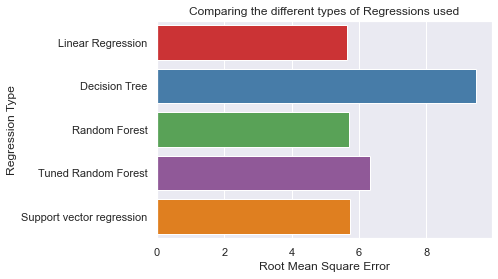

In [81]:
sns.barplot(x = regression['rmse'],y = regression['regression'], palette = 'Set1')
plt.ylabel('Regression Type')
plt.xlabel("Root Mean Square Error")
plt.title('Comparing the different types of Regressions used')

In [88]:
from yellowbrick.regressor import ResidualsPlot

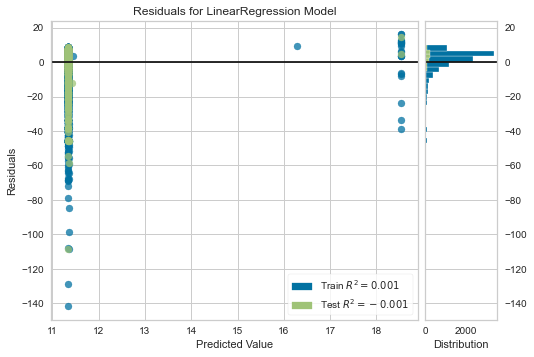

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [90]:
visualizerDT = ResidualsPlot(lr)

visualizerDT.fit(x_train, y_train)  # Fit the training data to the model
visualizerDT.score(x_val, y_val)  # Evaluate the model on the test data
visualizerDT.poof()                 # Draw/show/poof the data

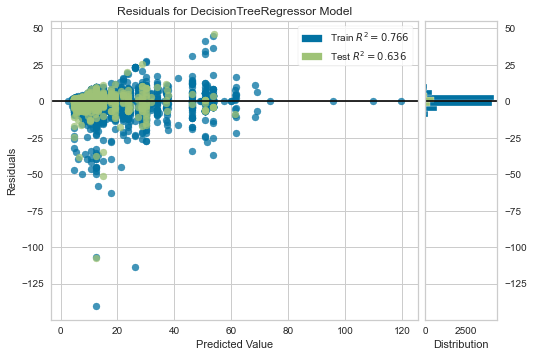

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
visualizerDT = ResidualsPlot(modelTreeReg3)

visualizerDT.fit(x_train, y_train)  # Fit the training data to the model
visualizerDT.score(x_val, y_val)  # Evaluate the model on the test data
visualizerDT.poof()   

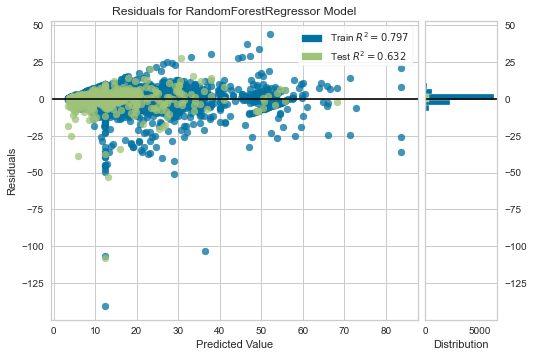

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [96]:
# Instantiate the visualizer
visualizer = ResidualsPlot(model2)

visualizer.fit(x_train, y_train)  # Fit the training data to the model
visualizer.score(x_val, y_val)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data